
Tree Based Models - Q10 - 12/July
===================================
An insurance agent recorded information about her current and potential customers. The data is available in 03_health_insurance.csv on Google drive.
https://drive.google.com/drive/folders/1Jl8iDu7nGmrqCECbrLqmVafgwE5PYfiU

Train a decision tree classifier using 80% of the data . Use 5 fold cross validation on the training data to get the best tree depth and min number of sample to split a node. 
Test your data on the remaining data.

1) How well does the model generalize? 

2) Can the agent use this to target potential customers?

In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read and display the data file
health_data = pd.read_csv('/Users/riteshturlapaty/ai-ml-learning/AccelerateAI/7.DecisionTree/DailyQuiz/03_health_insurance.csv')
health_data

,custid,sex,is.employed,income,marital.stat,housing.type,recent.move,num.vehicles,age,health.ins
0,2068,F,NaN,11300,Married,Homeowner free and clear,False,2.0,49,True
1,2848,M,True,4500,Never Married,Rented,True,3.0,22,False
2,5641,M,True,20000,Never Married,Occupied with no rent,False,0.0,22,False
3,6369,F,True,12000,Never Married,Rented,True,1.0,31,True
4,8322,F,True,180000,Never Married,Homeowner with mortgage/loan,False,1.0,40,True
...,...,...,...,...,...,...,...,...,...,...
905,1411132,F,False,46000,Divorced/Separated,Rented,True,1.0,56,True
906,1411860,F,NaN,5400,Widowed,NaN,NaN,NaN,89,True
907,1412161,M,True,38500,Married,Rented,True,1.0,29,True
908,1412971,M,NaN,43400,Married,Homeowner free and clear,False,1.0,88,True


In [3]:
# Rename the column names to m
health_data.rename({'custid':'customer_id','is.employed': 'is_employed', 'marital.stat': 'marital_status','housing.type':'housing_type','recent.move':'recent_move','num.vehicles':'num_of_vehicles','health.ins':'health_ins'}, axis=1, inplace=True)
health_data.head(2)

,customer_id,sex,is_employed,income,marital_status,housing_type,recent_move,num_of_vehicles,age,health_ins
0,2068,F,NaN,11300,Married,Homeowner free and clear,False,2.0,49,True
1,2848,M,True,4500,Never Married,Rented,True,3.0,22,False


In [4]:
# Check for null values
health_data.isna().sum()

customer_id          0
sex                  0
is_employed        255
income               0
marital_status       0
housing_type        31
recent_move         31
num_of_vehicles     31
age                  0
health_ins           0
dtype: int64

In [5]:
health_data.is_employed.value_counts()

True     593
False     62
Name: is_employed, dtype: int64

In [6]:
health_data.housing_type.value_counts()

Homeowner with mortgage/loan    390
Rented                          327
Homeowner free and clear        151
Occupied with no rent            11
Name: housing_type, dtype: int64

In [7]:
health_data.recent_move.value_counts()

False    768
True     111
Name: recent_move, dtype: int64

In [8]:
health_data.num_of_vehicles.value_counts()

2.0    335
1.0    282
3.0    124
4.0     66
0.0     55
5.0     11
6.0      6
Name: num_of_vehicles, dtype: int64

In [9]:
# fill NaN values
health_data['is_employed'] = health_data['is_employed'].fillna('True')
health_data['housing_type'] = health_data['housing_type'].fillna('Homeowner with mortgage/loan')
health_data['recent_move'] = health_data['recent_move'].fillna('False')
health_data['num_of_vehicles'] = health_data['num_of_vehicles'].fillna(0)


In [10]:
# Re-check if any of the colums have null values
health_data.isna().sum()

customer_id        0
sex                0
is_employed        0
income             0
marital_status     0
housing_type       0
recent_move        0
num_of_vehicles    0
age                0
health_ins         0
dtype: int64

In [11]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      910 non-null    int64  
 1   sex              910 non-null    object 
 2   is_employed      910 non-null    object 
 3   income           910 non-null    int64  
 4   marital_status   910 non-null    object 
 5   housing_type     910 non-null    object 
 6   recent_move      910 non-null    object 
 7   num_of_vehicles  910 non-null    float64
 8   age              910 non-null    int64  
 9   health_ins       910 non-null    bool   
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 65.0+ KB


In [12]:
# Segregate column names as per their datatype i.e this is to convert the values into numeric
cat_var_list = health_data[['sex','is_employed','marital_status','housing_type','recent_move']]
num_var_list = health_data[['customer_id', 'income', 'num_of_vehicles', 'age']]
target_list=health_data[['health_ins']]

In [13]:
cat_var_list

,sex,is_employed,marital_status,housing_type,recent_move
0,F,True,Married,Homeowner free and clear,False
1,M,True,Never Married,Rented,True
2,M,True,Never Married,Occupied with no rent,False
3,F,True,Never Married,Rented,True
4,F,True,Never Married,Homeowner with mortgage/loan,False
...,...,...,...,...,...
905,F,False,Divorced/Separated,Rented,True
906,F,True,Widowed,Homeowner with mortgage/loan,False
907,M,True,Married,Rented,True
908,M,True,Married,Homeowner free and clear,False


In [14]:
num_var_list

,customer_id,income,num_of_vehicles,age
0,2068,11300,2.0,49
1,2848,4500,3.0,22
2,5641,20000,0.0,22
3,6369,12000,1.0,31
4,8322,180000,1.0,40
...,...,...,...,...
905,1411132,46000,1.0,56
906,1411860,5400,0.0,89
907,1412161,38500,1.0,29
908,1412971,43400,1.0,88


In [15]:
# Create dummy values for columns where values are non-numeric
cat_var_dummies=pd.get_dummies(cat_var_list)

In [16]:
cat_var_dummies

,sex_F,sex_M,is_employed_False,is_employed_True,is_employed_True,marital_status_Divorced/Separated,marital_status_Married,marital_status_Never Married,marital_status_Widowed,housing_type_Homeowner free and clear,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented,recent_move_False,recent_move_True,recent_move_False
0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0
2,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0
3,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
4,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
906,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
907,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0
908,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0


In [17]:
target_list.head(2)

,health_ins
0,True
1,False


In [18]:
# Convert target variable values into numeric. Map the values
target_list['health_ins'] = target_list['health_ins'].map({True:1, False:0})

# Check T
target_list['health_ins'].value_counts()

1    791
0    119
Name: health_ins, dtype: int64

In [19]:
new_health_data = pd.concat([num_var_list,cat_var_dummies], axis=1)

In [20]:
new_health_data.head(2)

,customer_id,income,num_of_vehicles,age,sex_F,sex_M,is_employed_False,is_employed_True,is_employed_True,marital_status_Divorced/Separated,marital_status_Married,marital_status_Never Married,marital_status_Widowed,housing_type_Homeowner free and clear,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented,recent_move_False,recent_move_True,recent_move_False
0,2068,11300,2.0,49,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
1,2848,4500,3.0,22,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0


In [21]:
# Prepare X and y
X=new_health_data
y=target_list

In [22]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.20, random_state=25)

In [23]:
# Train the model
param_space = {'min_samples_split':list(range(1,40)),
                   'max_depth':list(range(1,40))
                  }

clf = GridSearchCV(DecisionTreeClassifier(), param_space, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24, 25, 26,
                                               27, 28, 29, 30, ...]})

In [24]:
# print accuracy, without model
without_model_accuracy = np.sum(y_test == 1) / y_test.shape[0]
without_model_accuracy

health_ins    0.880495
dtype: float64

In [25]:
print(f"Best Train Score is {np.round(clf.best_score_ * 100, 2)}")
print(f"Test Score is {np.round(clf.score(X_test,y_test) * 100, 2)}")
print(f"Accuracy without model is {np.round(without_model_accuracy * 100, 2)}")
print("Best Parameters:", clf.best_params_)

Best Train Score is 82.46
Test Score is 83.38
Accuracy without model is health_ins    88.05
dtype: float64
Best Parameters: {'max_depth': 2, 'min_samples_split': 2}


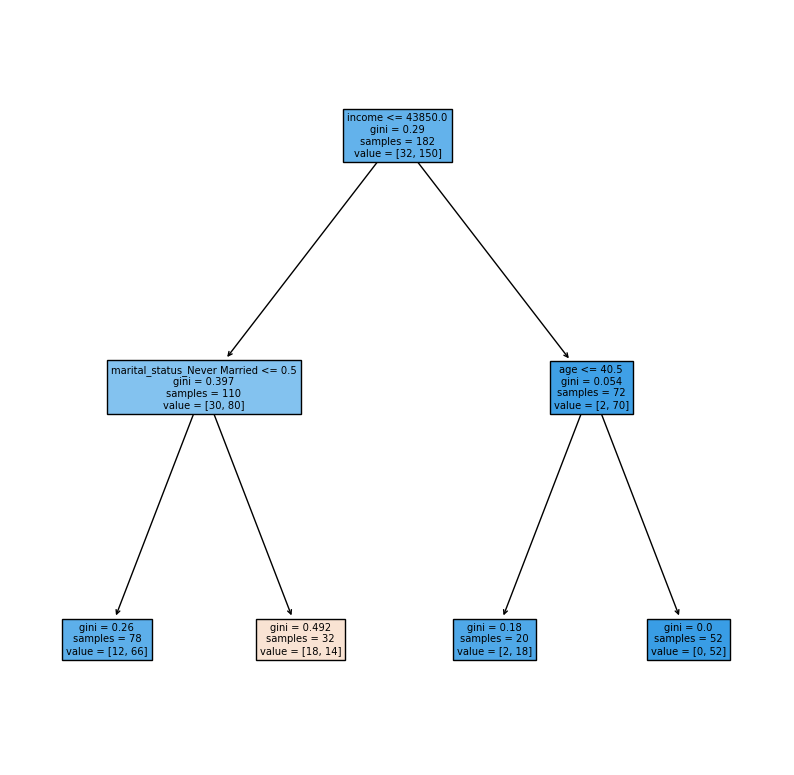

In [26]:
plt.figure(figsize=(10,10), dpi=100)
plot_tree(clf.best_estimator_, feature_names=new_health_data.columns, filled=True);

<font color='red'> As seen, accuracy without model is higher than the test accuracy and hence agent should use the model</font>